In [1]:
import pandas as pd
import glob
import numpy as np
import re
from tqdm.auto import tqdm
import pickle
from pandarallel import pandarallel
import re
import plotly.graph_objects as go

pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
data_in_comp = "../data/comp/"

In [3]:
df_parent = pd.read_parquet(data_in_comp + r"gw-block-pre-post.parquet.gzip")

In [4]:
df_parent.head()

,state,district,block,india,1994-pem,1994-pom,1994-st,1995-pem,1995-pom,1995-st,...,2018-pem,2018-pom,2018-st,2019-pem,2019-pom,2019-st,2020-pem,2020-pom,2020-st,total-st
0,andaman & nicobar,north & middle andaman,baratang island,india,NaN,NaN,NaN,3.45,0.09,1.0,...,NaN,NaN,NaN,1.94,0.32,2.0,NaN,NaN,NaN,2.0
1,andaman & nicobar,north & middle andaman,middle andaman,india,NaN,NaN,NaN,2.61,1.02,26.0,...,NaN,NaN,NaN,2.38,0.79,26.0,NaN,NaN,NaN,30.0
2,andaman & nicobar,south andaman,havelock island,india,NaN,NaN,NaN,3.08,1.64,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
3,andaman & nicobar,south andaman,neil island,india,NaN,NaN,NaN,4.39,2.27,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,andaman & nicobar,south andaman,south andaman,india,NaN,NaN,NaN,2.56,1.18,50.0,...,NaN,NaN,NaN,2.16,0.86,45.0,NaN,NaN,NaN,54.0


In [5]:
NO_OF_YEARS = (len(list(df_parent.columns)) - 4) // 3
YEARS = [str(i + 1994) for i in range(NO_OF_YEARS)]
YEARS_PRE = list(map(lambda year: year + "-pem", YEARS))
YEARS_POST = list(map(lambda year: year + "-pom", YEARS))
YEARS_STATIONS = list(map(lambda year: year + "-stations", YEARS))
YEARS_STATIONS.append("total-stations")

## Individual Stats

In [6]:
consume_yrs = YEARS_PRE + YEARS_POST
consume_yrs.sort()
del consume_yrs[0]
del consume_yrs[-1]

In [7]:
for i in range(1, len(consume_yrs) - 2, 2):
    df_parent[
        consume_yrs[i - 1].split("-")[0]
        + ":"
        + consume_yrs[i].split("-")[0]
        + "-cons"
    ] = (
        df_parent.loc[:, consume_yrs[i]] - df_parent.loc[:, consume_yrs[i - 1]]
    )

In [8]:
df_parent

,state,district,block,india,1994-pem,1994-pom,1994-st,1995-pem,1995-pom,1995-st,...,2009:2010-cons,2010:2011-cons,2011:2012-cons,2012:2013-cons,2013:2014-cons,2014:2015-cons,2015:2016-cons,2016:2017-cons,2017:2018-cons,2018:2019-cons
0,andaman & nicobar,north & middle andaman,baratang island,india,NaN,NaN,NaN,3.45,0.09,1.0,...,NaN,NaN,NaN,1.34,NaN,NaN,NaN,NaN,NaN,NaN
1,andaman & nicobar,north & middle andaman,middle andaman,india,NaN,NaN,NaN,2.61,1.02,26.0,...,NaN,NaN,NaN,1.30,NaN,NaN,NaN,NaN,NaN,NaN
2,andaman & nicobar,south andaman,havelock island,india,NaN,NaN,NaN,3.08,1.64,8.0,...,NaN,NaN,NaN,2.71,NaN,NaN,NaN,NaN,NaN,NaN
3,andaman & nicobar,south andaman,neil island,india,NaN,NaN,NaN,4.39,2.27,3.0,...,NaN,NaN,NaN,0.76,NaN,NaN,NaN,NaN,NaN,NaN
4,andaman & nicobar,south andaman,south andaman,india,NaN,NaN,NaN,2.56,1.18,50.0,...,NaN,NaN,NaN,1.21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,west bengal,uttar dinajpur,islampur,india,4.53,2.86,2.0,NaN,NaN,NaN,...,1.62,2.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45
5365,west bengal,uttar dinajpur,itahar,india,4.42,2.74,2.0,NaN,NaN,NaN,...,2.35,1.66,0.87,2.16,NaN,NaN,NaN,2.20,1.73,0.78
5366,west bengal,uttar dinajpur,kaliganj,india,4.32,2.69,3.0,NaN,NaN,NaN,...,1.30,1.40,2.76,0.69,NaN,NaN,NaN,2.12,0.78,3.04
5367,west bengal,uttar dinajpur,karandighi,india,5.77,4.80,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.74,NaN,NaN,NaN,2.72,0.52,NaN


### Decadal mean variable location and time period

In [11]:
decade_pre = [str(i) + "-pem" for i in range(2009, 2019)]
decade_post = [str(i) + "-pom" for i in range(2009, 2019)]
df_parent["2009-2018-avg-pem"] = (
    df_parent.loc[:, decade_pre].mean(axis=1).round(2)
)
df_parent["2009-2018-avg-pom"] = (
    df_parent.loc[:, decade_pre].mean(axis=1).round(2)
)

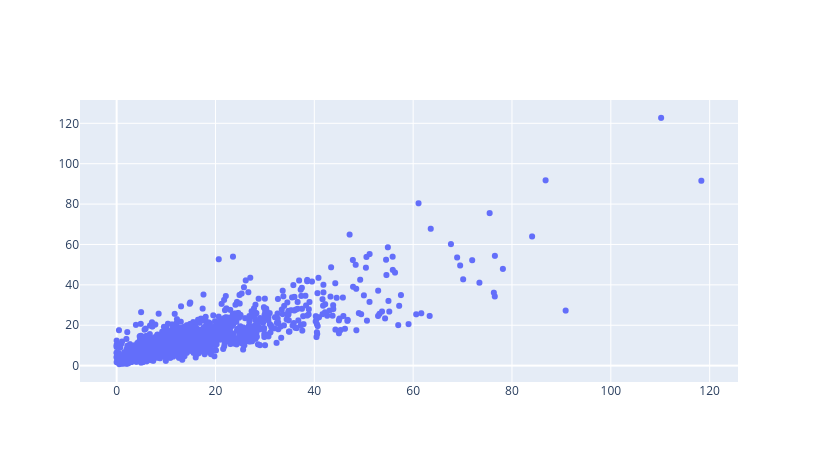

In [20]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_parent.loc[:, "2019-pem"],
        y=df_parent.loc[:, "2009-2018-avg-pem"],
        mode="markers",
        hovertext=df_parent.loc[:, "block"],
    )
)
fig.show()

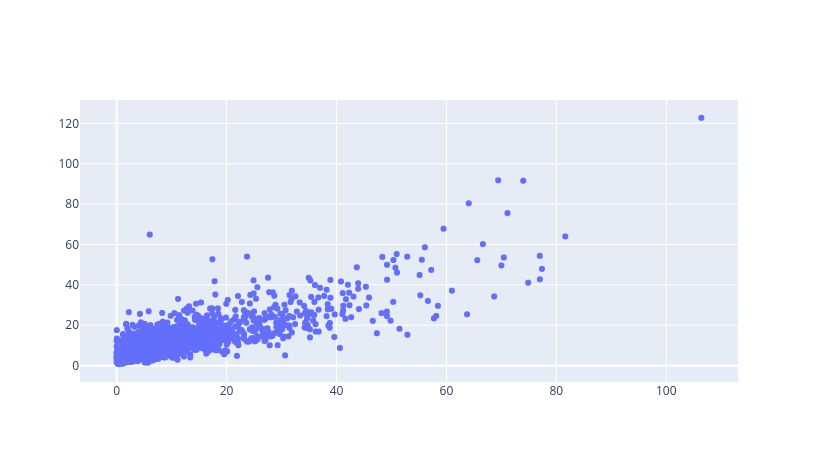

In [21]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_parent.loc[:, "2019-pom"],
        y=df_parent.loc[:, "2009-2018-avg-pom"],
        mode="markers",
        hovertext=df_parent.loc[:, "block"],
    )
)
fig.show()

### Yearly ground water level

In [32]:
df_parent.loc[:, YEARS_PRE + ["block"]]

,1994-pem,1995-pem,1996-pem,1997-pem,1998-pem,1999-pem,2000-pem,2001-pem,2002-pem,2003-pem,...,2012-pem,2013-pem,2014-pem,2015-pem,2016-pem,2017-pem,2018-pem,2019-pem,2020-pem,block
0,NaN,3.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.60,1.76,NaN,NaN,NaN,NaN,NaN,1.94,NaN,baratang island
1,NaN,2.61,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,...,1.08,2.22,NaN,NaN,NaN,NaN,NaN,2.38,NaN,middle andaman
2,NaN,3.08,NaN,NaN,1.80,NaN,NaN,NaN,NaN,NaN,...,1.10,3.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,havelock island
3,NaN,4.39,NaN,NaN,3.26,NaN,NaN,NaN,NaN,NaN,...,3.35,3.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neil island
4,NaN,2.56,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,...,1.04,2.33,NaN,NaN,NaN,NaN,NaN,2.16,NaN,south andaman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,4.53,NaN,3.97,3.82,4.26,4.18,3.26,4.46,NaN,NaN,...,NaN,3.28,NaN,NaN,NaN,NaN,2.93,2.41,NaN,islampur
5365,4.42,NaN,5.01,3.24,5.23,4.61,4.47,4.62,3.32,2.34,...,3.04,4.96,NaN,NaN,3.70,4.96,4.02,2.56,NaN,itahar
5366,4.32,NaN,3.96,4.28,5.61,4.38,5.06,4.41,4.41,4.34,...,5.05,4.66,NaN,NaN,4.64,4.94,3.60,5.11,NaN,kaliganj
5367,5.77,NaN,3.95,3.45,4.61,4.18,4.56,NaN,NaN,NaN,...,4.66,4.26,NaN,NaN,4.98,5.58,3.79,NaN,NaN,karandighi


### violin plot gw level of all regions : pre post consumption fluctuation

In [49]:
location='amber'
type_lo='block'
time='pre'
t=df_parent[df_parent["block"] == "amber"].loc[:, YEARS_PRE].values
t= t[~np.isnan(t)]

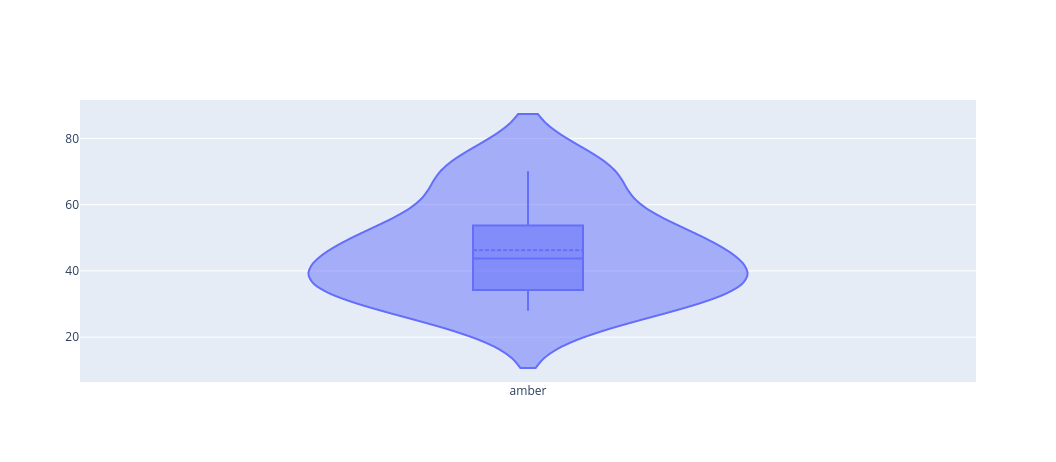

In [51]:
fig = go.Figure()
fig.add_trace(
    go.Violin(
        y=t,
        box_visible=True,
        meanline_visible=True,
        x0=location
    )
)
fig.show()

In [6]:
df = (
    df_parent.groupby("district")
    .agg(
        {
            **{i: ["mean"] for i in YEARS_PRE},
            **{i: ["mean"] for i in YEARS_POST},
            **{i: ["sum"] for i in YEARS_STATIONS},
        }
    )
    .round(2)
)

In [7]:
df = df.loc["jaipur", :]

In [8]:
df.index = df.index.droplevel(1)

In [9]:
PRE = df.filter(like="pre")[df.filter(like="pre").notna().values].rename(
    lambda x: x.split("-")[0]
)

In [10]:
POST = df.filter(like="post")[df.filter(like="post").notna().values].rename(
    lambda x: x.split("-")[0]
)

In [11]:
def get_clmns(series):
    clmns = {}
    for i in range(1, len(series.index)):
        clmns[str(series.index[i])] = (
            str(series.index[i - 1]) + ":" + str(series.index[i])
        )
    return clmns

In [12]:
PRE_DIFF = PRE.diff()
PRE_DIFF = PRE_DIFF.rename(get_clmns(PRE_DIFF)).iloc[1:]

In [13]:
POST_DIFF = POST.diff()
POST_DIFF = POST_DIFF.rename(get_clmns(POST_DIFF)).iloc[1:]

In [14]:
t = []
index = []
for i in range(len(PRE.index) - 1):
    t.append((PRE.iloc[i + 1] - POST.iloc[i]).round(2))
    index.append(str(POST.index[i]) + ":" + str(PRE.index[i + 1]))
USAGE = pd.Series(t, index=index)

In [51]:
t = []
index = []
for i in range(len(PRE.index)):
    t.append((POST.iloc[i] - PRE.iloc[i]).round(2))
    index.append(str(POST.index[i]) + ":" + str(PRE.index[i]))
FLUCTUATION = pd.Series(t, index=index)

### Pre-pre gw rainfall plot yearly

In [53]:
measure = (
    ["absolute"] + ["relative" for i in range(PRE_DIFF.shape[0])] + ["absolute"]
)

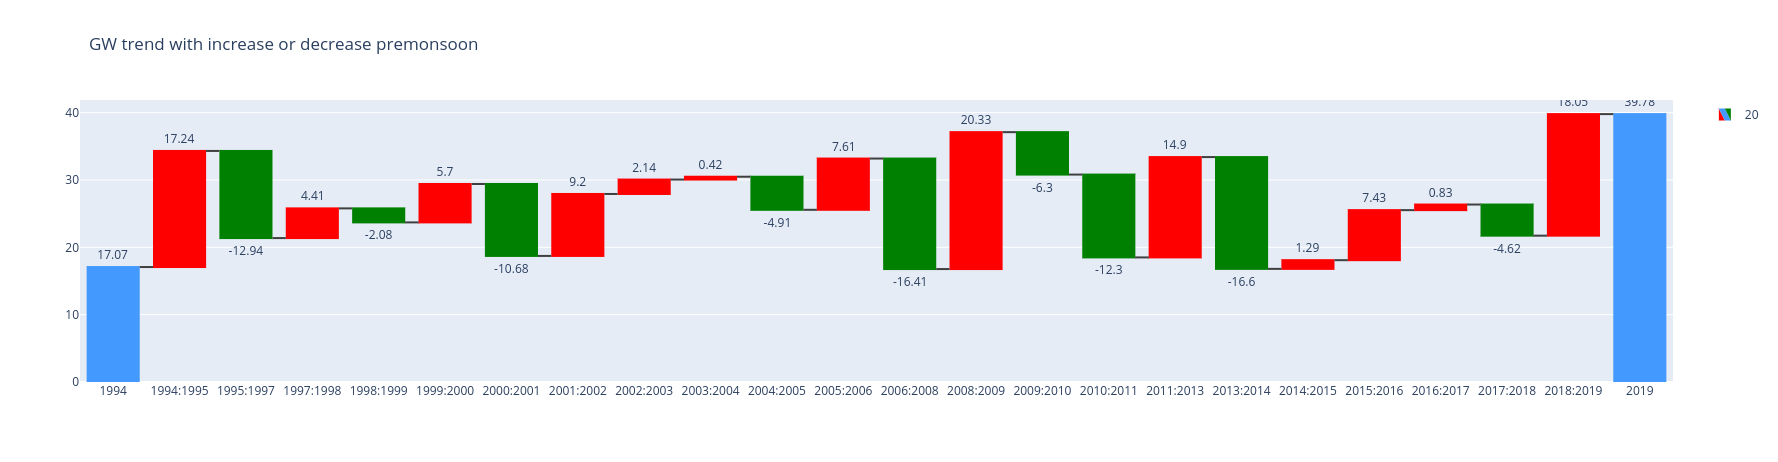

In [54]:
fig = go.Figure(
    go.Waterfall(
        name="20",
        orientation="v",
        measure=measure,
        x=[PRE.index.tolist()[0]]
        + PRE_DIFF.index.tolist()
        + [PRE.index.tolist()[-1]],
        textposition="outside",
        text=[PRE.iloc[0]] + list(PRE_DIFF.values.round(2)) + [PRE.iloc[-1]],
        y=[PRE.iloc[0]] + list(PRE_DIFF.values.round(2)) + [PRE.iloc[-1]],
        base=0,
        increasing={"marker": {"color": "Red"}},
        decreasing={"marker": {"color": "Green"}},
        connector={"line": {"color": "rgb(63, 63, 63)"}},
    )
)

fig.update_layout(
    title="GW trend with increase or decrease premonsoon", showlegend=True
)

fig.show()

### post-post gw waterfall chart yearly

In [18]:
measure = (
    ["absolute"]
    + ["relative" for i in range(POST_DIFF.shape[0])]
    + ["absolute"]
)

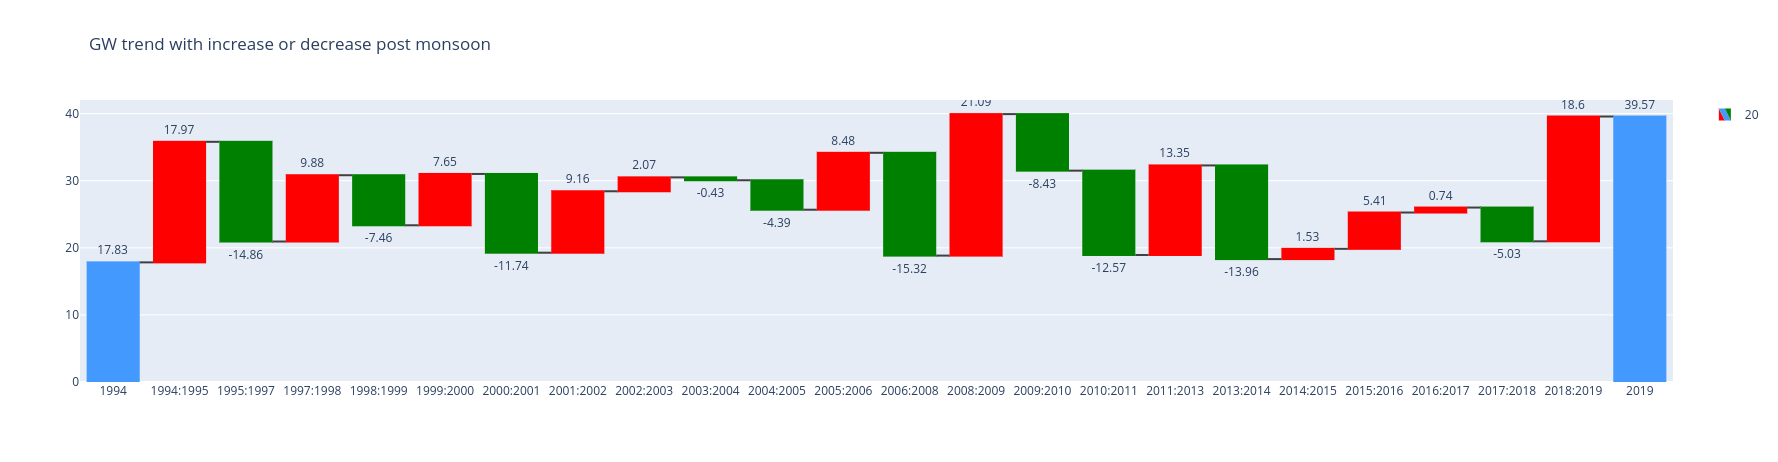

In [26]:
fig = go.Figure(
    go.Waterfall(
        name="20",
        orientation="v",
        measure=measure,
        x=[POST.index.tolist()[0]]
        + POST_DIFF.index.tolist()
        + [POST.index.tolist()[-1]],
        textposition="outside",
        text=[POST.iloc[0]] + list(POST_DIFF.values.round(2)) + [POST.iloc[-1]],
        y=[POST.iloc[0]] + list(POST_DIFF.values.round(2)) + [POST.iloc[-1]],
        base=0,
        increasing={"marker": {"color": "Red"}},
        decreasing={"marker": {"color": "Green"}},
        connector={"line": {"color": "rgb(63, 63, 63)"}},
    )
)

fig.update_layout(
    title="GW trend with increase or decrease post monsoon", showlegend=True
)
fig.show()

### All regions +ve or -ve consumption yearly

In [56]:
VALUES = FLUCTUATION.append(USAGE).sort_index()

In [57]:
measure = (
    ["absolute"] + ["relative" for i in range(VALUES.shape[0])] + ["absolute"]
)

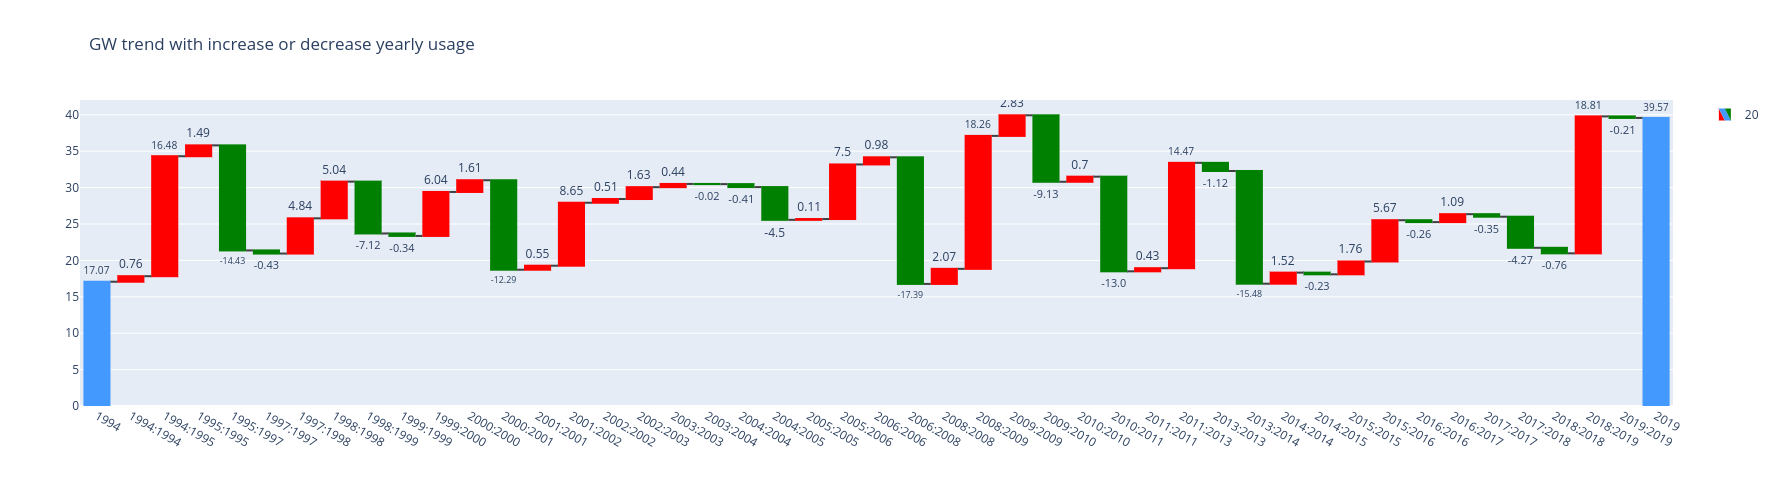

In [58]:
fig = go.Figure(
    go.Waterfall(
        name="20",
        orientation="v",
        measure=measure,
        x=[PRE.index.tolist()[0]]
        + VALUES.index.tolist()
        + [POST.index.tolist()[-1]],
        textposition="outside",
        text=[PRE.iloc[0]] + list(VALUES.values.round(2)) + [POST.iloc[-1]],
        y=[PRE.iloc[0]] + list(VALUES.values.round(2)) + [POST.iloc[-1]],
        base=0,
        increasing={"marker": {"color": "Red"}},
        decreasing={"marker": {"color": "Green"}},
        connector={"line": {"color": "rgb(63, 63, 63)"}},
    )
)

fig.update_layout(
    title="GW trend with increase or decrease yearly usage and fluctuation",
    showlegend=True,
)
fig.show()

### gw distribution 

In [150]:
t=df_parent[df_parent['district']=='jaipur'].groupby(['india','state','district','block']).count().reset_index()
labels=list(t.loc[:,'block'].values)
parents=list(t.loc[:,'district'].values)

In [145]:
t=df_parent[df_parent['state']=='rajasthan'].groupby(['state','district']).count().reset_index()
labels.extend(t.loc[:,'district'].values)
parents.extend(t.loc[:,'state'].values)

In [134]:
t=df_parent.groupby(['india','state']).count().reset_index()
labels.extend(list(t.loc[:,'state'].values))
parents.extend(list(t.loc[:,'india'].values))

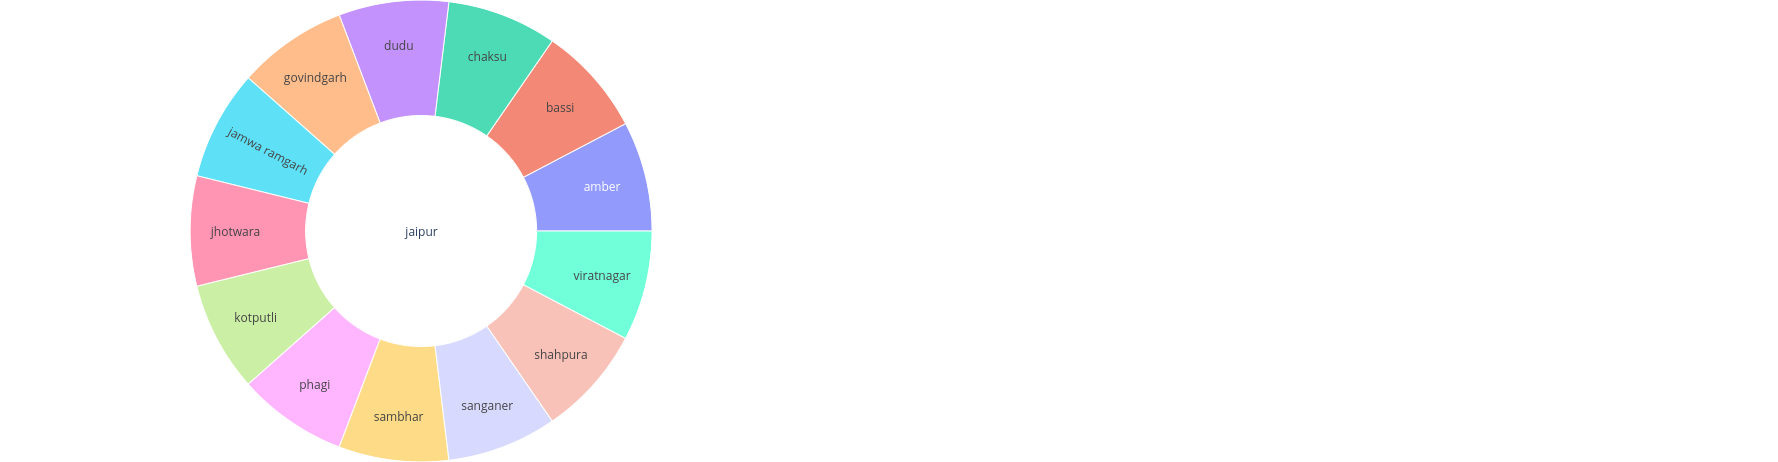

In [151]:
fig=go.Figure()
fig.add_trace(
    go.Sunburst(
        labels=labels,
        parents=parents
    )
)
fig.update_layout(
    grid= dict(columns=2, rows=1),
    margin = dict(t=0, l=0, r=0, b=0)
)
fig.show()